# Домашнее задание

In [73]:
import pandas as pd
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import spearmanr
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [74]:
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 
           0.0689]
col_names = ['petersburg', 'magadan']

# Объединение списков в датафрейм

In [75]:
df = pd.concat([p:=pd.Series(petersburg, name = 'petersburg'), m:=pd.Series(magadan, name='magadan')], axis=1, keys=[p.name,m.name])
df

,petersburg,magadan
0,0.0974,0.1033
1,0.1352,0.0915
2,0.0817,0.0781
3,0.1016,0.0685
4,0.0968,0.0677
5,0.1064,0.0697
6,0.1050,0.0764
7,NaN,0.0689


# Тест на нормальность

## Тест Шапиро-Уилка

In [76]:
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

Установим уровень значимости

In [77]:
alpha = 0.05

In [78]:
#_, p = shapiro(df[df.petersburg.notna()].petersburg)
_, p = shapiro(df[df.petersburg.notna()].petersburg)
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.242
Данные распределены нормально


In [79]:
_, p = shapiro(df['magadan'])
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.036
Данные не распределены нормально (мы отвергаем H0)


## Тест Д’Агостино

In [80]:
_, p = normaltest(df['magadan'])
#normaltest возвращает двустороннюю вероятность для проверки гипотезы

print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.154
Данные распределены нормально


e:\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


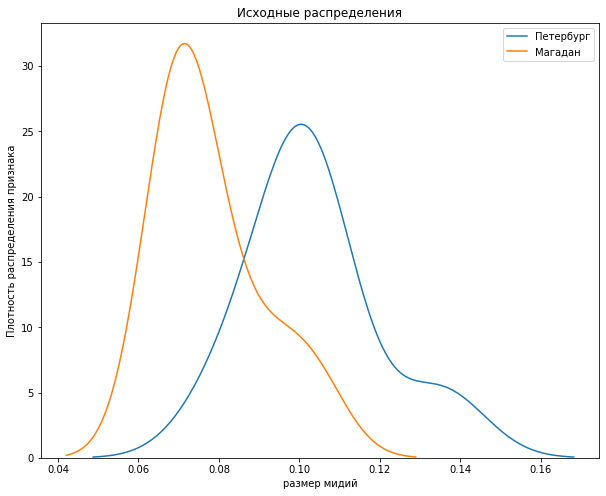

In [81]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')
ax1.set(xlabel='размер мидий', ylabel='Плотность распределения признака')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['petersburg'], ax=ax1, label ='Петербург')
sns.kdeplot(df['magadan'], ax=ax1, label ='Магадан')

plt.legend()


# Выводы:
1. Мы имеем два списка разной длины, тест на нормальность будем проводить на каждом признаке отдельно.  
2. В регионе Петербург делаем без учета NaN и так как в этом регионе всего 7 элементов можем провести только тест Шапиро-Уилка.
3. В регионе Петербург данные распределены нормально
4. Для региона Магадан делаем тест Шапиро-Уилка он говорит нам, что данные не распределены нормально, однако тест Д’Агостино говорит нам о нормальном распределении данных и он не применим на малых выборках.
5. Строим кривые исходных распределений они показывают, что данные распределены нормально
6. Верим алгоритмам и исходим из того что один признак распределен нормально а второй нет, но на всякий члучай сделаем и параметрический и не параметрический тесты


# Сравнительные тесты:
1. В качестве параметрического теста выбираем независимый t-тест, так как 1 категориальная переменная и данные происходят из разных совокупностей
2. В Качестве непараметрического теста выбираем тест Манна Уитни(сумму рангов Уилкоксона) по тем же соображениям

# Независимый t-тест

### Выдвигаем гипотезы

In [82]:
H0 = 'Нет значимой разницы между размерами раковин мидий в разных регионах.'
Ha = 'Есть значимая разница между  размерами раковин мидий в разных регионах.'

In [83]:
def t_test(df):
    print('\n' + "*** Результаты независимого T-теста ***")
    test_results = ttest_ind(df['petersburg'][df['petersburg'].notna()],
       df['magadan'][df['magadan'].notna()],
            equal_var=False)

    p = round(test_results[1],3)

    if p>alpha:
        print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
    else:
        print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

t_test(df)


*** Результаты независимого T-теста ***
0.006 <= 0.05. Мы отвергаем нулевую гипотезу. Есть значимая разница между  размерами раковин мидий в разных регионах.


## тест Манна Уитни

In [84]:
_, p = mannwhitneyu(df['petersburg'][df['petersburg'].notna()], df['magadan'][df['magadan'].notna()])

p = round(p, 3)

if p>alpha:
   print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
else:
  print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

0.006 <= 0.05. Мы отвергаем нулевую гипотезу. Есть значимая разница между  размерами раковин мидий в разных регионах.


### Выводы:
1. Оба теста говорят нам что есть значимая разница между размерами мидий в разных регионах выращивания

# Тест на корреляцию. Обоснование выбора теста

1. Коэффициент корреляции Пирсона может быть рассчитан для непрерывных нормально распределённых признаков
2. Мы можем применить ранговую корреляцию и для числовых переменных, которые распределены ненормально или если между ними существует нелинейная связь.
3. Лучшим вариантом будет придерживаться правил корреляций каждого из методов: для непрерывных нормально распределённых используем корреляцию Пирсона, для категориальных — ранговую. Однако в спорных случаях мы рассматриваем несколько вариантов корреляций. 
4. Берем только 7 элементов иначе тесты ругаются
## Вот этим мы и займемся

In [86]:
H0 = 'Отсутствует взаимосвязь между переменными'
Ha = 'Взаимосвязь между переменными есть'

## Корреляция Пирсона

In [89]:
_, p = pearsonr(df['petersburg'][:7], df['magadan'][:7])
print('p=%.3f' % p, 'корреляция=%.2f' % _)

p = round(p,3)
if p>alpha:
  print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
else:
  print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

p=0.581 корреляция=0.26
0.581 > 0.05. Мы не можем отвергнуть нулевую гипотезу. Отсутствует взаимосвязь между переменными


## Корреляция Спирмана

In [90]:
_, p = spearmanr(df['petersburg'][:7], df['magadan'][:7])
print('p=%.3f' % p, 'корреляция=%.2f' % _)

p = round(p,3)
if p>alpha:
  print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
else:
  print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

p=0.760 корреляция=0.14
0.76 > 0.05. Мы не можем отвергнуть нулевую гипотезу. Отсутствует взаимосвязь между переменными


In [95]:
df.mean()

petersburg    0.103443
magadan       0.078012
dtype: float64

In [96]:
df.petersburg.mean()-df.magadan.mean()

0.025430357142857143

### Выводы: 
1.Оба теста показали нам отсутствие взаимосвязи между переменными

### Общие выводы по проекту:
1. Выборка слишком мала, и разной длинны, образовался пропуск сильно осложнивший работу
2. Алгоритмы не дали однозначного представления о нормальности распределения, поэтому делали и параметрические и не параметрические тесты
3. Тесты на корреляцию показали отсутствие взаимосвязи между данными
4. В Петербурге средний размер мидий составляет 10,3 см в Магадане 7.8см разница в среднем размере составляет примерно 2.5см
5. Надеюсь я хоть как то разобрался в вопросе. 